In [27]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt


In [28]:
# Load dataset
iris = load_iris()
X = iris.data
y = iris.target


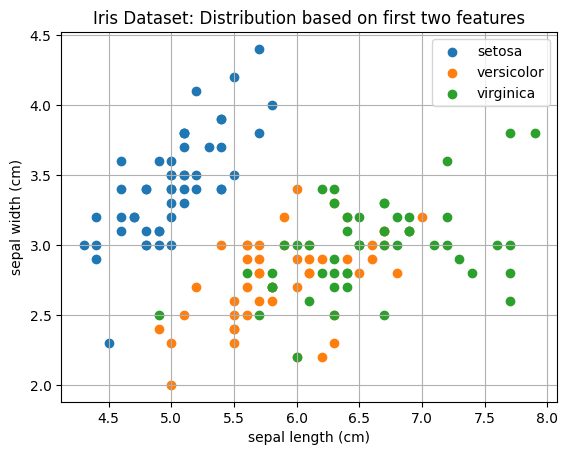

In [29]:
# Plotting the first two features
for class_value in range(3):
    plt.scatter(X[y==class_value, 0], X[y==class_value, 1], label=iris.target_names[class_value])

plt.xlabel(iris.feature_names[0])
plt.ylabel(iris.feature_names[1])
plt.title("Iris Dataset: Distribution based on first two features")
plt.legend()
plt.grid(True)
plt.show()


In [30]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



class KNN:
    def __init__(self, k=3):
        self.k = k

    def fit(self, X, y):
        self.X_train = X
        self.y_train = y

    def predict(self, X):
        y_pred = [self._predict(x) for x in X]
        return np.array(y_pred)

    def _predict(self, x):
        # Compute distances between x and all examples in the training set
        distances = [np.sqrt(np.sum((x - x_train)**2)) for x_train in self.X_train]

        # Sort by distance and return indices of the first k neighbors
        k_indices = np.argsort(distances)[:self.k]

        # Extract the labels of the k nearest neighbor training samples
        k_nearest_labels = [self.y_train[i] for i in k_indices]

        # Return the most common class label
        most_common = np.bincount(k_nearest_labels).argmax()
        return most_common


In [31]:
k = 3
clf = KNN(k=k)
clf.fit(X_train, y_train)
predictions = clf.predict(X_test)


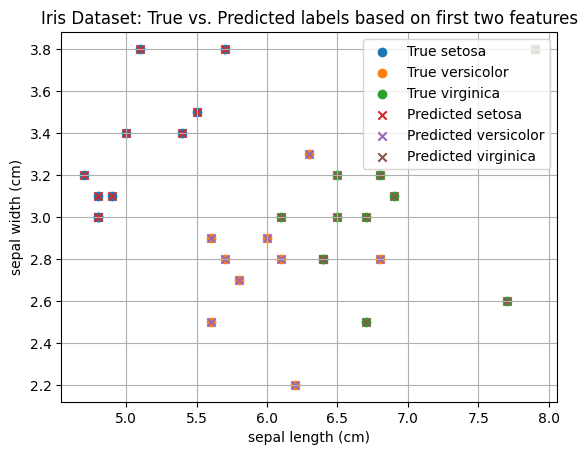

In [32]:
# Plot true labels
for class_value in range(3):
    plt.scatter(X_test[y_test==class_value, 0], X_test[y_test==class_value, 1], label=f"True {iris.target_names[class_value]}")

# Plot predicted labels with 'x' marker
for class_value in range(3):
    plt.scatter(X_test[predictions==class_value, 0], X_test[predictions==class_value, 1], label=f"Predicted {iris.target_names[class_value]}", marker='x')

plt.xlabel(iris.feature_names[0])
plt.ylabel(iris.feature_names[1])
plt.title("Iris Dataset: True vs. Predicted labels based on first two features")
plt.legend()
plt.grid(True)
plt.show()
